In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/8/train_dataset8.npz"
val = "Data/readelf/8/val_dataset8.npz"
test = "Data/readelf/8/test_dataset8.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x'][:1148]
y_train = training_dataset['y'][:1148]

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected: 68")
print("Data collection of XY simulated to 1% sampling rate, Dataset split: 60/4/4")
samples, timesteps, chunksize = x_train.shape
print("No. of samples: " + str(samples) + ", No. of timesteps: " + str(timesteps) + ", Chunksize: " + str(chunksize))
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected: 68
Data collection of XY simulated to 1% sampling rate, Dataset split: 60/4/4
No. of samples: 1148, No. of timesteps: 3840, Chunksize: 64
Training shape:  (1148, 3840, 64) (1148, 3840, 64)
Validation shape:  (82, 3840, 64) (82, 3840, 64)
Test shape:  (104, 3840, 64) (104, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error')

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=41,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1148 samples, validate on 82 samples
Epoch 1/200
1148/1148 [==============================] - 158s 138ms/step - loss: 0.0864 - val_loss: 0.0448
Epoch 2/200
1148/1148 [==============================] - 156s 136ms/step - loss: 0.0803 - val_loss: 0.0422
Epoch 3/200
1148/1148 [==============================] - 159s 138ms/step - loss: 0.0759 - val_loss: 0.0403
Epoch 4/200
1148/1148 [==============================] - 160s 139ms/step - loss: 0.0726 - val_loss: 0.0388
Epoch 5/200
1148/1148 [==============================] - 158s 138ms/step - loss: 0.0699 - val_loss: 0.0375
Epoch 6/200
1148/1148 [==============================] - 159s 139ms/step - loss: 0.06

1148/1148 [==============================] - 152s 132ms/step - loss: 0.0424 - val_loss: 0.0233
Epoch 73/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.0423 - val_loss: 0.0233
Epoch 74/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.0422 - val_loss: 0.0232
Epoch 75/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.0421 - val_loss: 0.0232
Epoch 76/200
1148/1148 [==============================] - 152s 132ms/step - loss: 0.0420 - val_loss: 0.0231
Epoch 77/200
1148/1148 [==============================] - 152s 132ms/step - loss: 0.0419 - val_loss: 0.0231
Epoch 78/200
1148/1148 [==============================] - 151s 131ms/step - loss: 0.0418 - val_loss: 0.0230
Epoch 79/200
1148/1148 [==============================] - 151s 132ms/step - loss: 0.0417 - val_loss: 0.0230
Epoch 80/200
1148/1148 [==============================] - 152s 132ms/step - loss: 0.0417 - val_loss: 0.0229
Epoch 81/200
1148/1148 [=================

1148/1148 [==============================] - 153s 134ms/step - loss: 0.0386 - val_loss: 0.0210
Epoch 148/200
1148/1148 [==============================] - 153s 133ms/step - loss: 0.0386 - val_loss: 0.0210
Epoch 149/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.0386 - val_loss: 0.0210
Epoch 150/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.0385 - val_loss: 0.0210
Epoch 151/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.0385 - val_loss: 0.0210
Epoch 152/200
1148/1148 [==============================] - 154s 134ms/step - loss: 0.0385 - val_loss: 0.0209
Epoch 153/200
1148/1148 [==============================] - 155s 135ms/step - loss: 0.0385 - val_loss: 0.0209
Epoch 154/200
1148/1148 [==============================] - 153s 133ms/step - loss: 0.0385 - val_loss: 0.0209
Epoch 155/200
1148/1148 [==============================] - 153s 133ms/step - loss: 0.0384 - val_loss: 0.0209
Epoch 156/200
1148/1148 [========

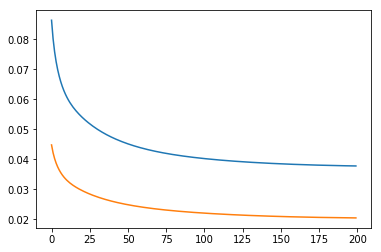

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

104/104 [==============================] - 4s 43ms/step
Test loss: 0.028913464647932693


In [5]:
model.save("/home/isa/FYPJ/Model/model8.h5")

In [6]:
x_predict = test_dataset['x'][:1]
predictions = model.predict(x_predict)
print(predictions[0][0]) # 1
print(predictions[0][1]) # 2 (1st row)
print(predictions[0][2]) # 1
print(predictions[0][3]) # 2 (2nd row)
print(predictions[0][4]) # 1
print(predictions[0][5]) # 2 (3rd row)
print(predictions[0][6]) # 1
print(predictions[0][7]) # 2 (4th row)
print(predictions[0][8]) # 1
print(predictions[0][9]) # 2 (5th row)
print(predictions[0][10])# 1
print(predictions[0][11])# 2 (6th row)
print(predictions[0][12])# 1
print(predictions[0][13])# 2 (7th row)
print(predictions[0][14])# 1
print(predictions[0][15])# 2 (8th row)
print("Offset")
print(predictions[0][788])# 1
print(predictions[0][789])# 2 (OFFSET 0xC50)

[-1.6152515e-04  6.4852519e-04  4.2907643e-04  3.2760357e-04
  0.0000000e+00  1.8101986e-05  2.6504029e-05 -1.5218931e-04
  8.5043408e-05  0.0000000e+00  0.0000000e+00  7.2234150e-05
  0.0000000e+00  0.0000000e+00 -3.6015952e-04  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
  2.9508330e-05 -0.0000000e+00 -5.8348201e-06 -2.7481738e-05
  4.9577520e-04 -5.3213415e-05 -3.2236669e-05  4.0976236e-05
  1.4231662e-04 -6.9386333e-05  0.0000000e+00  0.0000000e+00
  0.0000000e+00  1.6702113e-04  0.0000000e+00  7.5214099e-05
  2.9537801e-04  0.0000000e+00 -1.3572493e-04  1.2237437e-04
  0.0000000e+00 -5.6378037e-04  0.0000000e+00  1.5889206e-04
  5.3192102e-06  2.5520705e-05  1.3286610e-04  0.0000000e+00
 -4.0692059e-04  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.4506799e-04 -1.5327842e-05  3.4902859e-04  7.6615880e-04
  6.3144129e-05 -3.8257778e-05 -1.2044582e-06 -4.0702947e-04
  7.4925998e-07 -5.6654480e-06  7.3192859e-05 -1.1860649e-03]
[-2.32381775e-04  1.778